In [1]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 3.7 MB/s 
     |████████████████████████████████| 2.0 MB 32.1 MB/s 


In [ ]:
pip install git+https://github.com/PythonCharmers/starborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PythonCharmers/starborn to /tmp/pip-req-build-87u8s67e
  Running command git clone -q https://github.com/PythonCharmers/starborn /tmp/pip-req-build-87u8s67e
  Created wheel for starborn: filename=starborn-0.1-py3-none-any.whl size=5339 sha256=5e8a99d7344141a76d1747f6daded7546fa15b905eb275a467a3be7d0bf15508
  Stored in directory: /tmp/pip-ephem-wheel-cache-_c562972/wheels/18/c1/32/c448e13787568acf642c504767453221cf0cae90d8c8266e4c
Successfully built starborn


In [2]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt

import scipy.stats as st
import altair as alt
import matplotlib.pyplot as plt
import textstat


# Packages for data preparation
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import svm
import os

from scipy.sparse import lil_matrix
from sklearn.metrics import fbeta_score
#Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
#Thresh
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
#Random Forest
from sklearn.metrics import mean_squared_error

In [3]:
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#work on the data story, what are people upset and which , focus on Navies Bayes go back to the Navies Bayes homework

In [5]:
NB_WORDS = 10005  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

We read in the csv with the tweets data and perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets.

We'll only keep the text column as input and the airline_sentiment column as the target.


In [6]:
from google.colab import files
data_to_load = files.upload()

Saving Copy of Tweets.csv to Copy of Tweets.csv


# Data Preparation

In [7]:
#df = pd.read_csv('../input/Tweets.csv')
df = pd.read_csv('Copy of Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment', 'negativereason', 'airline']]
df.head()

text airline_sentiment  \
3506  @united @staralliance good.  Maybe that will m...           neutral   
5307  @SouthwestAir now flight is book and I have to...           neutral   
404   @VirginAmerica this is too cool!  Never been o...          positive   
6592  @SouthwestAir your gate agent re-routed an imp...          negative   
522   @united no I don't, but I'm sure United have m...           neutral   

                   negativereason         airline  
3506                          NaN          United  
5307                          NaN       Southwest  
404                           NaN  Virgin America  
6592  Flight Attendant Complaints       Southwest  
522                           NaN          United

In [ ]:
selection = alt.selection(type='interval')

In [ ]:
df['negativereason'] = df['negativereason'].dropna()

In [ ]:
df = df.dropna()

In [ ]:
df.negativereason.fillna(0)

9515               Lost Luggage
8782     Customer Service Issue
5947               Lost Luggage
13529    Customer Service Issue
160                 Late Flight
                  ...          
10928               Late Flight
14608          Cancelled Flight
677                  Bad Flight
11381    Customer Service Issue
10165          Cancelled Flight
Name: negativereason, Length: 9178, dtype: object

In [ ]:
df['negativereason'] = df['negativereason'].replace(np.nan, 'not known' )

In [ ]:
alt.Chart(df).mark_bar(size=30).encode(
    x="airline",
    y=alt.Y('count(negativereason)', stack="normalize", axis=alt.Axis(format='%')),
    color=alt.Color('negativereason', sort='ascending'),
        order=alt.Order('count(negativereason):Q', sort='descending')
).properties(width=400)
#convert them all to lower case 
#make a list of the ones that you want to use that 
#get rid of unknown , just for this chart 

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_bar(size=30).encode(
    x="airline",
    y=alt.Y('count(negativereason)', stack="normalize", axis=alt.Axis(format='%')),
    color=alt.Color('negativereason', sort='ascending'),
        order=alt.Order('count(negativereason):Q', sort='descending')
).properties(width=400)
#convert them all to lower case 
#make a list of the ones that you want to use that 
#get rid of unknown , just for this chart 

In [8]:
#adjust words for how many times they appear in the document 
text = df['text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Streaming output truncated to the last 5000 lines.
@USAirways Flight 1815 (N747UW) arrives at @FlyTPA following flight from @PHLAirport http://t.co/TtLwZgIyAg
@united this team added 30 mins on turnaround
@USAirways - I'm currently missing a basketball game due to your lost bag policy #terribleservice #wheresmyrefund
@USAirways Why did you put my luggage on the plane after mine? Then not deliver it to me like you said? Now show the claim as closed online?
@JetBlue your app needs updating. Says my flight is on time when we are well past boarding time with 2hr delay http://t.co/BTvpxTZJu0
@AmericanAir arrived in lax from ord flight AA1657 NO LUGGAGE
@SouthwestAir @PaytonTaylor129 I love Southwest and Payton Taylor!
@USAirways Look at that. The flight I have been trying to book for 3 days is gone. I guess someone got through. Thanks! Keep up the #Failing
@AmericanAir you said this last time. It doesn't take 6 weeks to reply to an email.
@AmericanAir can't get thru to anyone on phone
@JetB

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
df['Text_Length'] = df.text.apply(lambda x: len(x))

In [10]:
df['#_capital_leters'] = df['text'].str.findall(r'[A-Z]').str.len()

In [11]:
df['percentage_of_capital_letters'] = df['#_capital_leters']/df['Text_Length']

In [12]:
df['Greater_than_50%_capital_letters'] = df['percentage_of_capital_letters'].apply(lambda x:  x>= .5 )

In [13]:
df['Greater_than_50%_capital_letters'] = df['Greater_than_50%_capital_letters'].astype(int)

In [14]:
df['reading_level'] = df['text'].apply(lambda x :textstat.flesch_reading_ease(x))

In [15]:
df.describe()

Text_Length  #_capital_leters  percentage_of_capital_letters  \
count  14640.000000      14640.000000                   14640.000000   
mean     103.822063          5.917008                       0.061368   
std       36.277339          4.934437                       0.053529   
min       12.000000          0.000000                       0.000000   
25%       77.000000          3.000000                       0.031250   
50%      114.000000          5.000000                       0.050000   
75%      136.000000          8.000000                       0.076923   
max      186.000000        103.000000                       0.750000   

       Greater_than_50%_capital_letters  reading_level  
count                      14640.000000   14640.000000  
mean                           0.002459      70.741748  
std                            0.049529      21.618128  
min                            0.000000    -218.200000  
25%                            0.000000      61.330000  
50%                            0.000000      74.050000  
75%                            0.000000      84.680000  
max                            1.000000     115.130000

In [16]:
df[['reading_level']].describe()

reading_level
count   14640.000000
mean       70.741748
std        21.618128
min      -218.200000
25%        61.330000
50%        74.050000
75%        84.680000
max       115.130000

In [17]:
df

text airline_sentiment  \
3506   @united @staralliance good.  Maybe that will m...           neutral   
5307   @SouthwestAir now flight is book and I have to...           neutral   
404    @VirginAmerica this is too cool!  Never been o...          positive   
6592   @SouthwestAir your gate agent re-routed an imp...          negative   
522    @united no I don't, but I'm sure United have m...           neutral   
...                                                  ...               ...   
4323   @united and don't hope for me having a nicer f...          negative   
11529  @USAirways I just checked in online for tomorr...           neutral   
8302   @JetBlue Crisis averted! Flight #69 from BOS t...          positive   
13481  @AmericanAir @MurphyJulie it took them 6 hours...          negative   
11006  @USAirways I can't even use my return flight h...          negative   

                    negativereason         airline  Text_Length  \
3506                           NaN          United           91   
5307                           NaN       Southwest          120   
404                            NaN  Virgin America           74   
6592   Flight Attendant Complaints       Southwest          136   
522                            NaN          United           67   
...                            ...             ...          ...   
4323                    Bad Flight          United          138   
11529                          NaN      US Airways          134   
8302                           NaN           Delta          135   
13481       Customer Service Issue        American          121   
11006      Flight Booking Problems      US Airways          140   

       #_capital_leters  percentage_of_capital_letters  \
3506                  3                       0.032967   
5307                  3                       0.025000   
404                   4                       0.054054   
6592                  3                       0.022059   
522                   3                       0.044776   
...                 ...                            ...   
4323                  1                       0.007246   
11529                 6                       0.044776   
8302                 15                       0.111111   
13481                 6                       0.049587   
11006                 4                       0.028571   

       Greater_than_50%_capital_letters  reading_level  
3506                                  0          73.34  
5307                                  0          72.50  
404                                   0          89.75  
6592                                  0          67.76  
522                                   0          82.65  
...                                 ...            ...  
4323                                  0          92.12  
11529                                 0          77.23  
8302                                  0          89.45  
13481                                 0          89.75  
11006                                 0          63.02  

[14640 rows x 9 columns]

'😂': 'face with tears of joy'}                                      21
{'👍': 'thumbs up'}                                                   20
{'😊': 'smiling face with smiling eyes'}                              19
{'😡': 'pouting face'}                                                16

In [19]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [21]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#w_tokenizer = nltk.word_tokenize
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

#df = pd.DataFrame( columns= 'text')
df['text_lemmatized'] = df.text.apply(lambda x: lemmatize_text(x))

In [22]:
df.loc[df['text'].str.contains("ing"),'text']

3506     @united @staralliance good.  Maybe that will m...
13       @VirginAmerica @virginmedia I'm flying your #f...
11693    @USAirways @AmericanAir Your staff members are...
8949     @JetBlue I have a internal bleed in my foot, a...
2759     @united Don't ask me to be patient without off...
                               ...                        
188      @VirginAmerica Having an issue finding a missi...
4323     @united and don't hope for me having a nicer f...
11529    @USAirways I just checked in online for tomorr...
8302     @JetBlue Crisis averted! Flight #69 from BOS t...
11006    @USAirways I can't even use my return flight h...
Name: text, Length: 6238, dtype: object

In [25]:
df['text_lemmatized'].to_csv('name.csv', index =  False)

In [26]:
lemmatizer=WordNetLemmatizer()
for word in df['text']:
    print(lemmatizer.lemmatize(word))

Streaming output truncated to the last 5000 lines.
@united DM sent.  Thanks.
@JetBlue Can you take @Cosmopolitan off your blacklist... trying to work :(
@AmericanAir exceptional customer service from AA - my misplaced item was waiting for me at checkin followed by a smooth flight. Thank you!
@AmericanAir Mold on my flight?!? US3825 #filthyplane #hopeidonotgetsick http://t.co/zIK2UoXGnW
@USAirways seriously???  did you not see that I've spent 2 days - for multiple hours on hold just to have to hang up after the hours?
2/2 @united You don't really care about our comfort, you care about profitability. That's fine, just own up to it. #unfriendlyskies
@SouthwestAir  traveling 2bwi nMaryland 2morrw any chance the flight being Cancelled Flightled to inclement weather? Any chance can get earlier flight
.@AmericanAir I can't even get on the phone with your reservations team. The system automatically disconnects us.
@JetBlue @EllaHenderson the highlight of being delayed #freeconcert
@USAirways I

Data Cleaning

In [28]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)
df.head()

text airline_sentiment  \
3506    good. Maybe make losing medallion. #ProbablyNot           neutral   
5307   flight book fly standby allow check flight takes           neutral   
404                        cool! Never ur planes will!!          positive   
6592   gate agent re-routed impossible itinerary fin...          negative   
522              no don't, I'm sure United info system.           neutral   

                   negativereason         airline  Text_Length  \
3506                          NaN          United           91   
5307                          NaN       Southwest          120   
404                           NaN  Virgin America           74   
6592  Flight Attendant Complaints       Southwest          136   
522                           NaN          United           67   

      #_capital_leters  percentage_of_capital_letters  \
3506                 3                       0.032967   
5307                 3                       0.025000   
404                  4                       0.054054   
6592                 3                       0.022059   
522                  3                       0.044776   

      Greater_than_50%_capital_letters  reading_level  \
3506                                 0          73.34   
5307                                 0          72.50   
404                                  0          89.75   
6592                                 0          67.76   
522                                  0          82.65   

                                        text_lemmatized  
3506  [@united, @staralliance, good., Maybe, that, w...  
5307  [@SouthwestAir, now, flight, is, book, and, I,...  
404   [@VirginAmerica, this, is, too, cool!, Never, ...  
6592  [@SouthwestAir, your, gate, agent, re-routed, ...  
522   [@united, no, I, don't,, but, I'm, sure, Unite...

In [29]:
df.loc[:,["text","reading_level", "Text_Length", "#_capital_leters", "Greater_than_50%_capital_letters"]]

text  reading_level  \
3506     good. Maybe make losing medallion. #ProbablyNot          73.34   
5307    flight book fly standby allow check flight takes          72.50   
404                         cool! Never ur planes will!!          89.75   
6592    gate agent re-routed impossible itinerary fin...          67.76   
522               no don't, I'm sure United info system.          82.65   
...                                                  ...            ...   
4323    hope nicer flight time, try things right. You...          92.12   
11529   checked online tomorrow's flight thought get ...          77.23   
8302    Crisis averted! Flight #69 BOS FLL boarding. ...          89.45   
13481    took hours call back. Then disconnected twic...          89.75   
11006   can't even use return flight home change fees...          63.02   

       Text_Length  #_capital_leters  Greater_than_50%_capital_letters  
3506            91                 3                                 0  
5307           120                 3                                 0  
404             74                 4                                 0  
6592           136                 3                                 0  
522             67                 3                                 0  
...            ...               ...                               ...  
4323           138                 1                                 0  
11529          134                 6                                 0  
8302           135                15                                 0  
13481          121                 6                                 0  
11006          140                 4                                 0  

[14640 rows x 5 columns]

# Modeling Section

Train-Test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

#MAKE DEEP LEARNING MODEL FOR EACH AIRLINE 

#just mentioned the features that I choose 

# Train data samples: 13176
# Test data samples: 1464


Converting words to numbers

In [31]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10005 words in dictionary
Top 5 most common words are: [('flight', 3538), ('not', 1427), ('no', 1351), ('get', 1178), ('t', 1091)]


In [32]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

"2/2  You really care comfort, care profitability. That's fine, it. #unfriendlyskies" is converted into [69, 69, 11, 71, 188, 3438, 188, 4304, 115, 630, 35, 1803]


In [33]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[69, 69, 11, 71, 188, 3438, 188, 4304, 115, 630, 35, 1803]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 10.0 features with a value of 1.


In [34]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"2/2  You really care comfort, care profitability. That's fine, it. #unfriendlyskies" is converted into [69, 69, 11, 71, 188, 3438, 188, 4304, 115, 630, 35, 1803]
"[69, 69, 11, 71, 188, 3438, 188, 4304, 115, 630, 35, 1803]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 10.0 features with a value of 1.


In [35]:
X_train_w_features = pd.DataFrame(X_train_oh)
X_train_w_features["percentage_of_capital_letters"] = df.loc[X_train.index, ["percentage_of_capital_letters"]]
#do this for test data set, leave y test and train alone 

In [36]:
X_train_w_features["#_capital_leters"] = df.loc[X_train.index, ["#_capital_leters"]]

In [37]:
X_train_w_features["Text_Length"] = df.loc[X_train.index, ["Text_Length"]]

In [38]:
X_train_w_features["Greater_than_50%_capital_letters"] = df.loc[X_train.index, ["Greater_than_50%_capital_letters"]]

In [39]:
X_train_w_features["reading_level"] = df.loc[X_train.index, ["reading_level"]]

In [40]:
X_test_w_features = pd.DataFrame(X_test_oh)
X_test_w_features["Text_Length"] = df.loc[X_test.index, ["Text_Length"]]

In [41]:
X_test_w_features["reading_level"] = df.loc[X_test.index, ["reading_level"]]

In [42]:
X_test_w_features["#_capital_leters"] = df.loc[X_test.index, ["#_capital_leters"]]

In [43]:
X_test_w_features["percentage_of_capital_letters"] = df.loc[X_test.index, ["percentage_of_capital_letters"]]

In [44]:
X_test_w_features["Greater_than_50%_capital_letters"] = df.loc[X_test.index, ["Greater_than_50%_capital_letters"]]

In [45]:
X_test_w_features = X_test_w_features.fillna(0)

In [46]:
X_train_w_features = X_train_w_features.fillna(0)

In [47]:
df.loc[X_train.index, ["percentage_of_capital_letters"]]

percentage_of_capital_letters
3817                        0.015267
2146                        0.016393
3182                        0.050000
795                         0.044776
4762                        0.112903
...                              ...
5047                        0.028571
7142                        0.037037
11664                       0.031008
14046                       0.131387
1819                        0.014493

[13176 rows x 1 columns]

Converting the target classes to numbers

In [48]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

In [ ]:
#X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

#assert X_valid.shape[0] == y_valid.shape[0]
#assert X_train_rest.shape[0] == y_train_rest.shape[0]

#print('Shape of validation set:',X_valid.shape)

In [49]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_w_features, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)


Shape of validation set: (1318, 10010)


In [50]:
NB_WORDS = 10010  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [51]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()
#just creating the base model , 2 layer deep learning model. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640704    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [52]:
base_model

In [53]:
from tensorflow.keras import backend as K

In [54]:
from keras import metrics

In [ ]:
#do regular f1

In [55]:
X_train_rest.shape

(11858, 10010)

In [ ]:
y_train_rest.shape

(11858, 3)

In [56]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=[ 'accuracy']) #balance accur, f1 macro

                  #model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=[custom_f1, 'accuracy']) 
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [58]:
base_history = deep_model(base_model)

In [59]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    

In [60]:
plt.style.use('ggplot')

In [61]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    

e can see here that the validation loss starts to increase as from epoch 4. The training loss continues to lower, which is normal as the model is trained to fit the train data as good as possible.

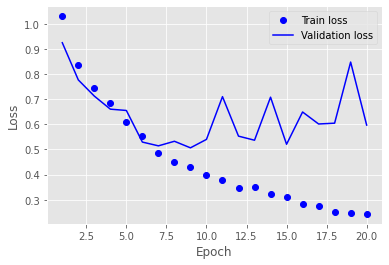

In [62]:
eval_metric(base_history, 'loss')
#part of the reason for the distribution is due to filling all the nans with zero 
# the fact the validation loss is greater than the train loss is proof that this is a valid model

Just as with the validation loss, the validation accuracy peaks at an early epoch. After that, it goes down slightly. So to conclude, we can say that the model starts overfitting as from epoch 4.

Handling overfitting

Now, we can try to do something about the overfitting. There are different options to do that.

Option 1: reduce the network's size by removing layers or reducing the number of hidden elements in the layers
Option 2: add regularization, which comes down to adding a cost to the loss function for large weights
Option 3: adding dropout layers, which will randomly remove certain features by setting them to zero

Reducing the network's size
We reduce the network's size by removing one layer and lowering the number of hidden elements in the remaining layer to 32.

In [63]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()
#creating the reduced model was to deal with overfitting 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320352    
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 320,451
Trainable params: 320,451
Non-trainable params: 0
_________________________________________________________________


In [64]:
reduced_history = deep_model(reduced_model)

In [65]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel("loss")
    plt.legend()
    plt.show()

We can see that it takes more epochs before the reduced model starts overfitting (around epoch 10). Moreover, the loss increases much slower after that epoch compared to the baseline model.

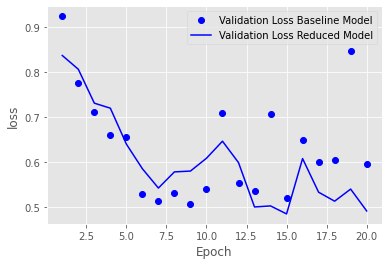

In [66]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')
#validation loss in reduced model is less overall 

Adding regularization
To address overfitting, we can also add regularization to the model. Let's try with L2 regularization.

In [67]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                640704    
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [68]:
reg_history = deep_model(reg_model)

For the regularized model we notice that it starts overfitting earlier than the baseline model. However, the loss increases much slower afterwards.

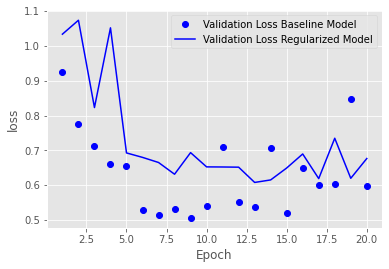

In [69]:
compare_loss_with_baseline(reg_history, 'Regularized Model')
#Validation loss for both models are very close by the end 

Adding dropout layers
The last option we'll try is to add dropout layers.

In [70]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()
#the drop model and reg model and reduced model is all to deal with the overfitting 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640704    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [71]:
drop_history = deep_model(drop_model)

The model with dropout layers starts overfitting a bit later than the baseline model. The loss also increases slower than the baseline model.

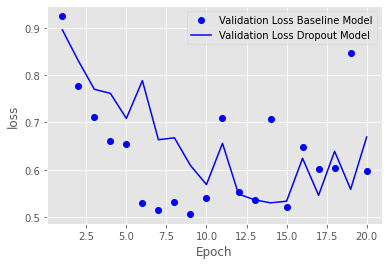

In [72]:
compare_loss_with_baseline(drop_history, 'Dropout Model')
#validation loss is still going down but now it is starting to match the baseline model

In [73]:
import tensorflow as tf


In [74]:
base_model.save('base_model.h5')

In [75]:
new_model = tf.keras.models.load_model('base_model.h5')

In [ ]:
new_model =  tf.keras.models.model_from_config('base_model.h5')

ValueError: ignored

In [76]:
import tweepy

In [77]:
api_key= "1wwBNBurlszabx6uF8ooWlPu8"
api_key_secret = "9h1n3lNaGb6E56z6WDC388Hc7M2i94hXKC6tyqtlVCmNIohGji"

In [78]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAKVmZQEAAAAAW5GroVkr0Bc2KgZpcy%2FjSS3Kuto%3DI9idtho2UbI7hVTjrs3sOrYWh6PKm8XBEh6ZkjypaUucsxTsWy"

In [79]:
access_token = "1492574308341731331-7DqS91z2OSWmRd2BWjiztmwJ7eJQE8"
secret_access_token = "ruXnomsFMpLzObj5Ya1wxO2y7qG6TyAnoejnbPwqluvZ3"

In [80]:
username = 'united'

In [81]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, secret_access_token)
api = tweepy.API(auth)

In [82]:
queryTopic = '@united'

In [83]:
tweets = [tweet for tweet in tweepy.Cursor(api.search, q = queryTopic, lang= 'en', result_type = "mixed", count = 200).items(200)]

In [ ]:
tweets

[Status(_api=<tweepy.api.API object at 0x7f8dc8b0bb90>, _json={'created_at': 'Sun Jun 19 14:05:46 +0000 2022', 'id': 1538523438465396742, 'id_str': '1538523438465396742', 'text': 'Seriously, @united? You throw your employees under the bus like this in public and then wonder why you have to canc… https://t.co/nQTO3ITaYg', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'united', 'name': 'United Airlines', 'id': 260907612, 'id_str': '260907612', 'indices': [11, 18]}], 'urls': [{'url': 'https://t.co/nQTO3ITaYg', 'expanded_url': 'https://twitter.com/i/web/status/1538523438465396742', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1538522606634250242, 'in_reply_to_status_id_str': '1538522606634250242', 'in_reply_to_user_id': 31667539

In [84]:
df_user_tweets = pd.DataFrame()
try:     

    # Pulling information from tweets iterable object and adding relevant tweet information in our data frame
    for tweet in tweets:
        df_user_tweets = df_user_tweets.append(
                          {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                     'Description': tweet.user._json['description'],
                           'Location': tweet.user._json['location'],
             'Followers Count': tweet.user._json['followers_count'],
                 'Friends Count': tweet.user._json['friends_count'],
               'Statuses Count': tweet.user._json['statuses_count'],
         'Profile Image Url': tweet.user._json['profile_image_url'],
                         }, ignore_index=True)
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [85]:
df_user_tweets

Created at       User ID  \
0    Tue Jun 21 14:48:00 +0000 2022  1.539259e+18   
1    Wed Jun 22 20:01:07 +0000 2022  1.539700e+18   
2    Wed Jun 22 15:53:42 +0000 2022  1.539638e+18   
3    Thu Jun 23 01:53:49 +0000 2022  1.539789e+18   
4    Thu Jun 23 01:53:44 +0000 2022  1.539789e+18   
..                              ...           ...   
195  Tue Jun 21 14:11:55 +0000 2022  1.539250e+18   
196  Tue Jun 21 14:11:16 +0000 2022  1.539250e+18   
197  Tue Jun 21 14:10:50 +0000 2022  1.539249e+18   
198  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   
199  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   

                                             User Name  \
0                                               Danesh   
1                                          LAX Airport   
2                                 O'Hare Intl. Airport   
3                       Alex Sumuel | Wander With Alex   
4                                     Christian Rogner   
..                                                 ...   
195  🈲 Kai Chang:Shadow Broker of Grey-Market Ideas ☢️   
196                                Barry A. Perlmutter   
197                   Cool Hand Luke( 🌈 transitioned )   
198                                             Ioniee   
199                                    MarshallBrewdog   

                                                  Text  \
0    Racist decided to refer to a Persian man as "s...   
1    A nice pop of @united  blue on this #WingTipWe...   
2    Dream a @united dream. ❤️❤️ (📷: IG / aviation_...   
3    I gotta re-think flying @AmericanAir. Spent 7 ...   
4    @united currently sitting at SHD and waiting f...   
..                                                 ...   
195  RT @MiCaulkSticky: @profamirattaran @united @r...   
196  @united Airlines can cancel a flight and don't...   
197  @TheRivermanRuns @Runningaep @profamirattaran ...   
198  @united After being told I would get a full re...   
199  @profamirattaran @Conservativeind @united @rcm...   

                                           Description  \
0    (He/Him) Need someone identified? \n🔍 Tips acc...   
1    Welcome to LAX! This account is not monitored ...   
2    Official O'Hare Intl. Airport (ORD) twitter fe...   
3    ✈️ Founder of Wander With Alex #travel website...   
4    In continuous pursuit to find better ways to m...   
..                                                 ...   
195  !⃝ 𝗧𝗵𝗶𝘀 𝗽𝗿𝗼𝗳𝗶𝗹𝗲 𝗽𝗼𝘀𝘁𝘀 𝘂𝗻𝗱𝗶𝘀𝗽𝘂𝘁𝗲𝗱 🔥\nUnorthodox...   
196  64 years young and retired 9 years. I voluntee...   
197  I acted like a Tom boy so my mommy took me to ...   
198                                        Traveling 🦋   
199  Navy vet, prior LEO, pilot and skydiver. Marri...   

                      Location  Followers Count  Friends Count  \
0                United States          98468.0         1337.0   
1                  Los Angeles         140175.0         1343.0   
2              Chicago, IL USA          60254.0          478.0   
3             Coastal Virginia           1333.0         1952.0   
4     Lewisburg, West Virginia             74.0          175.0   
..                         ...              ...            ...   
195  Always In Your Blind Spot           6256.0          746.0   
196              Cornelius, OR             31.0          127.0   
197              New York, USA             98.0          241.0   
198                                         8.0           27.0   
199                                        23.0           74.0   

     Statuses Count                                  Profile Image Url  
0            5271.0  http://pbs.twimg.com/profile_images/1425516468...  
1           31742.0  http://pbs.twimg.com/profile_images/1531768219...  
2           23920.0  http://pbs.twimg.com/profile_images/1532055435...  
3             105.0  http://pbs.twimg.com/profile_images/1428830573...  
4            1044.0  http://pbs.twimg.com/profile_images/6032838275...  
..              ...                                               

In [86]:
#adjust words for how many times they appear in the document 
text = df_user_tweets['Text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Original text is
Racist decided to refer to a Persian man as "stupid musIim", "terrorist", and "this guy is going to blow up the pla… https://t.co/JkipskSwpF
A nice pop of @united  blue on this #WingTipWednesday c: @speedbirdhd https://t.co/JwnScnzpsy
Dream a @united dream. ❤️❤️ (📷: IG / aviation_lover356 ) #avgeek https://t.co/5dOPMwcN4j
I gotta re-think flying @AmericanAir. Spent 7 hours dealing with delay after delay after delay. I haven't had any s… https://t.co/rGP4SYI8cz
@united currently sitting at SHD and waiting for the IAD ground stop to lift. The crew on SKW 5163 and the ground s… https://t.co/Ehsei3OEUG
RT @EDUC8_2_EMPOWER: This keeps happening and this is the worst yet. 7 hour and 18 minute delay for my flight tomorrow. @united you have to…
This keeps happening and this is the worst yet. 7 hour and 18 minute delay for my flight tomorrow. @united you have… https://t.co/4nWQWSahn5
Flying @united and this is the worst experience I've ever had flying. Two gate delays, multiple

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#w_tokenizer = nltk.word_tokenize
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(Text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Text)]

#df = pd.DataFrame( columns= 'text')
df_user_tweets['text_lemmatized'] = df_user_tweets.Text.apply(lambda x: lemmatize_text(x))

In [88]:
lemmatizer=WordNetLemmatizer()
for word in df_user_tweets['Text']:
    print(lemmatizer.lemmatize(word))

Racist decided to refer to a Persian man as "stupid musIim", "terrorist", and "this guy is going to blow up the pla… https://t.co/JkipskSwpF
A nice pop of @united  blue on this #WingTipWednesday c: @speedbirdhd https://t.co/JwnScnzpsy
Dream a @united dream. ❤️❤️ (📷: IG / aviation_lover356 ) #avgeek https://t.co/5dOPMwcN4j
I gotta re-think flying @AmericanAir. Spent 7 hours dealing with delay after delay after delay. I haven't had any s… https://t.co/rGP4SYI8cz
@united currently sitting at SHD and waiting for the IAD ground stop to lift. The crew on SKW 5163 and the ground s… https://t.co/Ehsei3OEUG
RT @EDUC8_2_EMPOWER: This keeps happening and this is the worst yet. 7 hour and 18 minute delay for my flight tomorrow. @united you have to…
This keeps happening and this is the worst yet. 7 hour and 18 minute delay for my flight tomorrow. @united you have… https://t.co/4nWQWSahn5
Flying @united and this is the worst experience I've ever had flying. Two gate delays, multiple equipment delays

In [89]:
df_user_tweets['Text'] = df_user_tweets['Text'].replace(';', ',')

In [90]:
df_user_tweets

Created at       User ID  \
0    Tue Jun 21 14:48:00 +0000 2022  1.539259e+18   
1    Wed Jun 22 20:01:07 +0000 2022  1.539700e+18   
2    Wed Jun 22 15:53:42 +0000 2022  1.539638e+18   
3    Thu Jun 23 01:53:49 +0000 2022  1.539789e+18   
4    Thu Jun 23 01:53:44 +0000 2022  1.539789e+18   
..                              ...           ...   
195  Tue Jun 21 14:11:55 +0000 2022  1.539250e+18   
196  Tue Jun 21 14:11:16 +0000 2022  1.539250e+18   
197  Tue Jun 21 14:10:50 +0000 2022  1.539249e+18   
198  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   
199  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   

                                             User Name  \
0                                               Danesh   
1                                          LAX Airport   
2                                 O'Hare Intl. Airport   
3                       Alex Sumuel | Wander With Alex   
4                                     Christian Rogner   
..                                                 ...   
195  🈲 Kai Chang:Shadow Broker of Grey-Market Ideas ☢️   
196                                Barry A. Perlmutter   
197                   Cool Hand Luke( 🌈 transitioned )   
198                                             Ioniee   
199                                    MarshallBrewdog   

                                                  Text  \
0    Racist decided to refer to a Persian man as "s...   
1    A nice pop of @united  blue on this #WingTipWe...   
2    Dream a @united dream. ❤️❤️ (📷: IG / aviation_...   
3    I gotta re-think flying @AmericanAir. Spent 7 ...   
4    @united currently sitting at SHD and waiting f...   
..                                                 ...   
195  RT @MiCaulkSticky: @profamirattaran @united @r...   
196  @united Airlines can cancel a flight and don't...   
197  @TheRivermanRuns @Runningaep @profamirattaran ...   
198  @united After being told I would get a full re...   
199  @profamirattaran @Conservativeind @united @rcm...   

                                           Description  \
0    (He/Him) Need someone identified? \n🔍 Tips acc...   
1    Welcome to LAX! This account is not monitored ...   
2    Official O'Hare Intl. Airport (ORD) twitter fe...   
3    ✈️ Founder of Wander With Alex #travel website...   
4    In continuous pursuit to find better ways to m...   
..                                                 ...   
195  !⃝ 𝗧𝗵𝗶𝘀 𝗽𝗿𝗼𝗳𝗶𝗹𝗲 𝗽𝗼𝘀𝘁𝘀 𝘂𝗻𝗱𝗶𝘀𝗽𝘂𝘁𝗲𝗱 🔥\nUnorthodox...   
196  64 years young and retired 9 years. I voluntee...   
197  I acted like a Tom boy so my mommy took me to ...   
198                                        Traveling 🦋   
199  Navy vet, prior LEO, pilot and skydiver. Marri...   

                      Location  Followers Count  Friends Count  \
0                United States          98468.0         1337.0   
1                  Los Angeles         140175.0         1343.0   
2              Chicago, IL USA          60254.0          478.0   
3             Coastal Virginia           1333.0         1952.0   
4     Lewisburg, West Virginia             74.0          175.0   
..                         ...              ...            ...   
195  Always In Your Blind Spot           6256.0          746.0   
196              Cornelius, OR             31.0          127.0   
197              New York, USA             98.0          241.0   
198                                         8.0           27.0   
199                                        23.0           74.0   

     Statuses Count                                  Profile Image Url  \
0            5271.0  http://pbs.twimg.com/profile_images/1425516468...   
1           31742.0  http://pbs.twimg.com/profile_images/1531768219...   
2           23920.0  http://pbs.twimg.com/profile_images/1532055435...   
3             105.0  http://pbs.twimg.com/profile_images/1428830573...   
4            1044.0  http://pbs.twimg.com/profile_images/6032838275...   
..              ...                                         

In [91]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df_user_tweets.Text= df_user_tweets.Text.apply(remove_stopwords).apply(remove_mentions)
df_user_tweets.Text.head()

0    Racist decided refer Persian man "stupid musIi...
1    nice pop  blue #WingTipWednesday c:  https://t...
2    Dream  dream. ❤️❤️ (📷: IG aviation_lover356 #a...
3    gotta re-think flying . Spent hours dealing de...
4     currently sitting SHD waiting IAD ground stop...
Name: Text, dtype: object

In [92]:
df_user_tweets

Created at       User ID  \
0    Tue Jun 21 14:48:00 +0000 2022  1.539259e+18   
1    Wed Jun 22 20:01:07 +0000 2022  1.539700e+18   
2    Wed Jun 22 15:53:42 +0000 2022  1.539638e+18   
3    Thu Jun 23 01:53:49 +0000 2022  1.539789e+18   
4    Thu Jun 23 01:53:44 +0000 2022  1.539789e+18   
..                              ...           ...   
195  Tue Jun 21 14:11:55 +0000 2022  1.539250e+18   
196  Tue Jun 21 14:11:16 +0000 2022  1.539250e+18   
197  Tue Jun 21 14:10:50 +0000 2022  1.539249e+18   
198  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   
199  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   

                                             User Name  \
0                                               Danesh   
1                                          LAX Airport   
2                                 O'Hare Intl. Airport   
3                       Alex Sumuel | Wander With Alex   
4                                     Christian Rogner   
..                                                 ...   
195  🈲 Kai Chang:Shadow Broker of Grey-Market Ideas ☢️   
196                                Barry A. Perlmutter   
197                   Cool Hand Luke( 🌈 transitioned )   
198                                             Ioniee   
199                                    MarshallBrewdog   

                                                  Text  \
0    Racist decided refer Persian man "stupid musIi...   
1    nice pop  blue #WingTipWednesday c:  https://t...   
2    Dream  dream. ❤️❤️ (📷: IG aviation_lover356 #a...   
3    gotta re-think flying . Spent hours dealing de...   
4     currently sitting SHD waiting IAD ground stop...   
..                                                 ...   
195                           RT :         65 papes a…   
196   Airlines cancel flight care effects thwir cys...   
197                          … https://t.co/LDYnkjYVnL   
198   After told would get full refund two weeks ag...   
199                          … https://t.co/bR08a6IC01   

                                           Description  \
0    (He/Him) Need someone identified? \n🔍 Tips acc...   
1    Welcome to LAX! This account is not monitored ...   
2    Official O'Hare Intl. Airport (ORD) twitter fe...   
3    ✈️ Founder of Wander With Alex #travel website...   
4    In continuous pursuit to find better ways to m...   
..                                                 ...   
195  !⃝ 𝗧𝗵𝗶𝘀 𝗽𝗿𝗼𝗳𝗶𝗹𝗲 𝗽𝗼𝘀𝘁𝘀 𝘂𝗻𝗱𝗶𝘀𝗽𝘂𝘁𝗲𝗱 🔥\nUnorthodox...   
196  64 years young and retired 9 years. I voluntee...   
197  I acted like a Tom boy so my mommy took me to ...   
198                                        Traveling 🦋   
199  Navy vet, prior LEO, pilot and skydiver. Marri...   

                      Location  Followers Count  Friends Count  \
0                United States          98468.0         1337.0   
1                  Los Angeles         140175.0         1343.0   
2              Chicago, IL USA          60254.0          478.0   
3             Coastal Virginia           1333.0         1952.0   
4     Lewisburg, West Virginia             74.0          175.0   
..                         ...              ...            ...   
195  Always In Your Blind Spot           6256.0          746.0   
196              Cornelius, OR             31.0          127.0   
197              New York, USA             98.0          241.0   
198                                         8.0           27.0   
199                                        23.0           74.0   

     Statuses Count                                  Profile Image Url  \
0            5271.0  http://pbs.twimg.com/profile_images/1425516468...   
1           31742.0  http://pbs.twimg.com/profile_images/1531768219...   
2           23920.0  http://pbs.twimg.com/profile_images/1532055435...   
3             105.0  http://pbs.twimg.com/profile_images/1428830573...   
4            1044.0  http://pbs.twimg.com/profile_images/6032838275...   
..              ...                                         

In [93]:
df_user_tweets

Created at       User ID  \
0    Tue Jun 21 14:48:00 +0000 2022  1.539259e+18   
1    Wed Jun 22 20:01:07 +0000 2022  1.539700e+18   
2    Wed Jun 22 15:53:42 +0000 2022  1.539638e+18   
3    Thu Jun 23 01:53:49 +0000 2022  1.539789e+18   
4    Thu Jun 23 01:53:44 +0000 2022  1.539789e+18   
..                              ...           ...   
195  Tue Jun 21 14:11:55 +0000 2022  1.539250e+18   
196  Tue Jun 21 14:11:16 +0000 2022  1.539250e+18   
197  Tue Jun 21 14:10:50 +0000 2022  1.539249e+18   
198  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   
199  Tue Jun 21 14:10:08 +0000 2022  1.539249e+18   

                                             User Name  \
0                                               Danesh   
1                                          LAX Airport   
2                                 O'Hare Intl. Airport   
3                       Alex Sumuel | Wander With Alex   
4                                     Christian Rogner   
..                                                 ...   
195  🈲 Kai Chang:Shadow Broker of Grey-Market Ideas ☢️   
196                                Barry A. Perlmutter   
197                   Cool Hand Luke( 🌈 transitioned )   
198                                             Ioniee   
199                                    MarshallBrewdog   

                                                  Text  \
0    Racist decided refer Persian man "stupid musIi...   
1    nice pop  blue #WingTipWednesday c:  https://t...   
2    Dream  dream. ❤️❤️ (📷: IG aviation_lover356 #a...   
3    gotta re-think flying . Spent hours dealing de...   
4     currently sitting SHD waiting IAD ground stop...   
..                                                 ...   
195                           RT :         65 papes a…   
196   Airlines cancel flight care effects thwir cys...   
197                          … https://t.co/LDYnkjYVnL   
198   After told would get full refund two weeks ag...   
199                          … https://t.co/bR08a6IC01   

                                           Description  \
0    (He/Him) Need someone identified? \n🔍 Tips acc...   
1    Welcome to LAX! This account is not monitored ...   
2    Official O'Hare Intl. Airport (ORD) twitter fe...   
3    ✈️ Founder of Wander With Alex #travel website...   
4    In continuous pursuit to find better ways to m...   
..                                                 ...   
195  !⃝ 𝗧𝗵𝗶𝘀 𝗽𝗿𝗼𝗳𝗶𝗹𝗲 𝗽𝗼𝘀𝘁𝘀 𝘂𝗻𝗱𝗶𝘀𝗽𝘂𝘁𝗲𝗱 🔥\nUnorthodox...   
196  64 years young and retired 9 years. I voluntee...   
197  I acted like a Tom boy so my mommy took me to ...   
198                                        Traveling 🦋   
199  Navy vet, prior LEO, pilot and skydiver. Marri...   

                      Location  Followers Count  Friends Count  \
0                United States          98468.0         1337.0   
1                  Los Angeles         140175.0         1343.0   
2              Chicago, IL USA          60254.0          478.0   
3             Coastal Virginia           1333.0         1952.0   
4     Lewisburg, West Virginia             74.0          175.0   
..                         ...              ...            ...   
195  Always In Your Blind Spot           6256.0          746.0   
196              Cornelius, OR             31.0          127.0   
197              New York, USA             98.0          241.0   
198                                         8.0           27.0   
199                                        23.0           74.0   

     Statuses Count                                  Profile Image Url  \
0            5271.0  http://pbs.twimg.com/profile_images/1425516468...   
1           31742.0  http://pbs.twimg.com/profile_images/1531768219...   
2           23920.0  http://pbs.twimg.com/profile_images/1532055435...   
3             105.0  http://pbs.twimg.com/profile_images/1428830573...   
4            1044.0  http://pbs.twimg.com/profile_images/6032838275...   
..              ...                                         

Preprocesser class

In [100]:

#only def text_length will work for sure
class Preprocesser:
  def __init__(self):
    pass
  def fit(self, text_column):
    self.df = pd.DataFrame(text_column)
    self.df['text_length'] = self.text_length(text_column)
    self.df['num_capital_letters'] = self.num_capital_letters(text_column)
    self.df['percentage_of_capital_letters'] = self.percentage_of_capital_letters(text_column)
    self.df['greater_than_50_percent'] = self.greater_than_50_percent(df.percentage_of_capital_letters)
    self.df['reading_level'] = self.reading_level(text_column)
    #df =pd.DataFrame(Text.df_user_tweets
    return self.df
  def lemmatize(self, text_column):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    self.df['text_lemmatized'] = df_user_tweets.Text.apply(lambda x: lemmatizer.lemmatize(x)) 
    #self.df_user_tweets['text_lemmatized'] = df_user_tweets.Text.apply(lambda x: lemmatizer.lemmatize(x))
  def fitvectorize(self, text_column):
     #step 1 make the vectorizer and make it an attribute of the class
     #step 2 fit the vectorizer
     #step 3 make def vectorize, than transform the text colum using the vectroizer and return a matrix
     # turn the matrix into a dataframe than use the vocabulary(attribute of the vectorizer) to fill in the column names
    # cat the other columns in the dataframe 
    self.vectorizer = CountVectorizer(min_df=10)
    self.vectorizer = self.vectorizer.fit(text_column)
    
  def vectorize_transform(self, text_column):
    x = self.vectorizer.transform(text_column)

    
    


    return self.df
      
   

  #CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
#vectorizer.fit(text)

# call `transform` to convert text to a bag of words
#x = vectorizer.transform(text)


  def text_length(self,column):
    return column.apply(lambda x: len(x))
  def num_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()
  def percentage_of_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()/column.apply(lambda x: len(x))
  def greater_than_50_percent(self,column): 
    return column.apply(lambda x:  x >= .5 )
  def reading_level(self,column):
    return column.apply(lambda x :textstat.flesch_reading_ease(x))
 
  

  def lemmatize_text(Text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Text)]

  def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
  def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)  


In [105]:
pre = Preprocesser()

In [107]:
Pre_df = pre.fit(text_column = df_user_tweets.Text)

In [108]:
Pre_df

Text  text_length  \
0    Racist decided refer Persian man "stupid musIi...          112   
1    nice pop  blue #WingTipWednesday c:  https://t...           60   
2    Dream  dream. ❤️❤️ (📷: IG aviation_lover356 #a...           75   
3    gotta re-think flying . Spent hours dealing de...           89   
4     currently sitting SHD waiting IAD ground stop...          104   
..                                                 ...          ...   
195                           RT :         65 papes a…           24   
196   Airlines cancel flight care effects thwir cys...           53   
197                          … https://t.co/LDYnkjYVnL           32   
198   After told would get full refund two weeks ag...          119   
199                          … https://t.co/bR08a6IC01           32   

     num_capital_letters  percentage_of_capital_letters  \
0                      6                       0.053571   
1                      5                       0.083333   
2                      7                       0.093333   
3                      6                       0.067416   
4                     15                       0.144231   
..                   ...                            ...   
195                    2                       0.083333   
196                    1                       0.018868   
197                    6                       0.187500   
198                    6                       0.050420   
199                    3                       0.093750   

     greater_than_50_percent  reading_level  
0                      False          31.89  
1                      False           6.17  
2                      False          31.55  
3                      False          32.05  
4                      False          72.32  
..                       ...            ...  
195                    False          92.80  
196                    False          64.37  
197                    False        -132.59  
198                    False          62.85  
199                    False        -132.59  

[200 rows x 6 columns]

Training on the full train data and evaluation on test data
At first sight the reduced model seems to be the best model for generalization. But let's check that on the test set.

# ROC_AUC Score

In [ ]:
prediction = base_model.predict(X_test_w_features)

In [ ]:
prediction

array([[9.4081378e-01, 5.8824379e-02, 3.6182758e-04],
       [9.9285805e-01, 7.0571327e-03, 8.4848674e-05],
       [9.5437455e-01, 4.5259003e-02, 3.6645180e-04],
       ...,
       [9.9999976e-01, 1.0093244e-07, 6.5455886e-08],
       [9.9968815e-01, 1.1865924e-05, 2.9997464e-04],
       [9.9993968e-01, 2.2178083e-05, 3.8176026e-05]], dtype=float32)

In [ ]:
prediction

array([[1.0568132e-02, 1.6739960e-01, 8.2203233e-01],
       [1.0000000e+00, 3.5526158e-09, 1.2670219e-12],
       [9.5081466e-01, 4.2999636e-02, 6.1857058e-03],
       ...,
       [9.9974412e-01, 2.5570634e-04, 8.0259277e-08],
       [1.0000000e+00, 7.9583654e-13, 3.4972832e-17],
       [9.0366411e-01, 1.5381749e-03, 9.4797701e-02]], dtype=float32)

In [ ]:
base_prediction = base_model.predict(X_test_w_features)

In [ ]:
base_prediction[:,0]>.5

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
base_prediction

array([[9.4081378e-01, 5.8824379e-02, 3.6182758e-04],
       [9.9285805e-01, 7.0571327e-03, 8.4848674e-05],
       [9.5437455e-01, 4.5259003e-02, 3.6645180e-04],
       ...,
       [9.9999976e-01, 1.0093244e-07, 6.5455886e-08],
       [9.9968815e-01, 1.1865924e-05, 2.9997464e-04],
       [9.9993968e-01, 2.2178083e-05, 3.8176026e-05]], dtype=float32)

In [ ]:
base_prediction

array([[1.0568132e-02, 1.6739960e-01, 8.2203233e-01],
       [1.0000000e+00, 3.5526158e-09, 1.2670219e-12],
       [9.5081466e-01, 4.2999636e-02, 6.1857058e-03],
       ...,
       [9.9974412e-01, 2.5570634e-04, 8.0259277e-08],
       [1.0000000e+00, 7.9583654e-13, 3.4972832e-17],
       [9.0366411e-01, 1.5381749e-03, 9.4797701e-02]], dtype=float32)

In [ ]:
base_prediction # convert class probabilities into class labels

array([[3.1057280e-04, 3.3776014e-04, 9.9935168e-01],
       [9.9999964e-01, 1.9629863e-07, 6.3321849e-08],
       [2.7077159e-01, 6.3441372e-01, 9.4814718e-02],
       ...,
       [9.9991953e-01, 8.0382881e-05, 9.0369007e-08],
       [9.1049279e-04, 1.0427041e-06, 9.9908853e-01],
       [2.0673302e-01, 7.7338624e-01, 1.9880725e-02]], dtype=float32)

In [ ]:
#try to convert positive and neutral in 0 and negative into 1 

In [ ]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
base_prediction

array([[9.4081378e-01, 5.8824379e-02, 3.6182758e-04],
       [9.9285805e-01, 7.0571327e-03, 8.4848674e-05],
       [9.5437455e-01, 4.5259003e-02, 3.6645180e-04],
       ...,
       [9.9999976e-01, 1.0093244e-07, 6.5455886e-08],
       [9.9968815e-01, 1.1865924e-05, 2.9997464e-04],
       [9.9993968e-01, 2.2178083e-05, 3.8176026e-05]], dtype=float32)

In [ ]:
base_prediction

array([[1.0568132e-02, 1.6739960e-01, 8.2203233e-01],
       [1.0000000e+00, 3.5526158e-09, 1.2670219e-12],
       [9.5081466e-01, 4.2999636e-02, 6.1857058e-03],
       ...,
       [9.9974412e-01, 2.5570634e-04, 8.0259277e-08],
       [1.0000000e+00, 7.9583654e-13, 3.4972832e-17],
       [9.0366411e-01, 1.5381749e-03, 9.4797701e-02]], dtype=float32)

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='macro')

0.26776176966490656

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='macro')

0.2546784859997186

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='micro')

0.6088126471577531

In [ ]:
y_test_oh

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
pos_label

In [ ]:
f1_score(y_test == 'negative', base_prediction[:,0]>.5)

0.8462709284627092

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test == 'negative', base_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.73      0.75      0.74       542
        True       0.85      0.84      0.84       922

    accuracy                           0.80      1464
   macro avg       0.79      0.79      0.79      1464
weighted avg       0.81      0.80      0.81      1464



In [ ]:
print(classification_report(y_test == 'negative', base_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.82      0.58      0.68       559
        True       0.78      0.92      0.85       905

    accuracy                           0.79      1464
   macro avg       0.80      0.75      0.76      1464
weighted avg       0.80      0.79      0.78      1464



In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test == 'negative', base_prediction[:,0])

0.8797912610324277

In [ ]:
roc_auc_score(y_test == 'negative', base_prediction[:,0])

0.8797912610324277

In [ ]:
roc_auc_score(y_test == 'negative', base_prediction[:,0])

0.8299348874319921

In [ ]:
base_prediction_sm

<1464x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1509 stored elements in List of Lists format>

In [ ]:
base_prediction_sm.todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [ ]:
base_prediction_sm.todense()[:,0]

matrix([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [ ]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [ ]:
reduced_prediction = reduced_model.predict(X_test_w_features)

In [ ]:
reduced_prediction_sm = label_to_sm(labels=reduced_prediction, n_classes=3)
reduced_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
print(classification_report(y_test == 'negative', reduced_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.70      0.77      0.73       559
        True       0.85      0.79      0.82       905

    accuracy                           0.78      1464
   macro avg       0.77      0.78      0.78      1464
weighted avg       0.79      0.78      0.79      1464



In [ ]:
print(classification_report(y_test == 'negative', reduced_prediction[:,0]>.5))#just ran

              precision    recall  f1-score   support

       False       0.70      0.77      0.73       559
        True       0.85      0.79      0.82       905

    accuracy                           0.78      1464
   macro avg       0.77      0.78      0.78      1464
weighted avg       0.79      0.78      0.79      1464



In [ ]:
roc_auc_score(y_test == 'negative', reduced_prediction[:,0])

0.8332005653347039

In [ ]:
roc_auc_score(y_test == 'negative', reduced_prediction[:,0])#just ran

0.8332005653347039

In [ ]:
reduced_results = roc_auc_score(y_test_oh, reduced_prediction)
print('/n')
print('roc_auc_score of reduced model: {0:.2f}%'.format(reduced_results))#just ran

/n
roc_auc_score of reduced model: 0.83%


In [ ]:
reg_prediction = reg_model.predict(X_test_w_features)

In [ ]:
roc_auc_score(y_test == 'negative', reg_prediction[:,0])

0.8304747032486979

In [ ]:
f1_score(y_test == 'negative', reg_prediction[:,0]>.5)

0.8135977337110482

In [ ]:
f1_score(y_test == 'negative', reg_prediction[:,0]>.5)

0.8135977337110482

In [ ]:
print(classification_report(y_test == 'negative', reg_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.69      0.75      0.72       559
        True       0.83      0.79      0.81       905

    accuracy                           0.78      1464
   macro avg       0.76      0.77      0.77      1464
weighted avg       0.78      0.78      0.78      1464



In [ ]:
print(classification_report(y_test == 'negative', reg_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.69      0.75      0.72       559
        True       0.83      0.79      0.81       905

    accuracy                           0.78      1464
   macro avg       0.76      0.77      0.77      1464
weighted avg       0.78      0.78      0.78      1464



In [ ]:
roc_auc_score(y_test == 'negative', reg_prediction[:,0])

0.8304747032486979

In [ ]:
reg_results = roc_auc_score(y_test_oh, reg_prediction)
print('/n')
print('roc_auc_score of regularized model: {0:.2f}%'.format(reg_results))

/n
roc_auc_score of regularized model: 0.84%


In [ ]:
drop_prediction = drop_model.predict(X_test_w_features)

In [ ]:
f1_score(y_test == 'negative', drop_prediction[:,0]>.5)

0.8418230563002681

In [ ]:
print(classification_report(y_test == 'negative', drop_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.76      0.69      0.72       559
        True       0.82      0.87      0.84       905

    accuracy                           0.80      1464
   macro avg       0.79      0.78      0.78      1464
weighted avg       0.80      0.80      0.80      1464



In [ ]:
roc_auc_score(y_test == 'negative', drop_prediction[:,0])

0.8704503899030431

In [ ]:
drop_results = roc_auc_score(y_test_oh, drop_prediction)
print('/n')
print('roc_auc_score of dropout model: {0:.2f}%'.format(drop_results))

/n
roc_auc_score of dropout model: 0.84%


In [ ]:
drop_prediction_sm = label_to_sm(labels=drop_prediction, n_classes=3)
drop_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='macro')

0.2546784859997186

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='micro')

0.6156462585034015

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='weighted')

0.47230333981505196

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test

1761     negative
6312     negative
11375    negative
5253     positive
1939     negative
           ...   
9291     negative
2576     positive
14434    negative
10692    negative
9430     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
X_test.shape

(1464,)

In [ ]:
base_model

In [ ]:
base_model.output_shape

(None, 3)

In [ ]:
base_model.input_shape

(None, 10010)

In [ ]:
prediction = base_model.predict(X_test)

ValueError: ignored

In [ ]:
prediction = base_model.predict(y_train)

ValueError: ignored

In [ ]:
y_test

1761     negative
6312     negative
11375    negative
5253     positive
1939     negative
           ...   
9291     negative
2576     positive
14434    negative
10692    negative
9430     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_test_le

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
y_pred1

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
modelrf.fit(X_train_oh, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Machine Learning

Machine Learning models

In [ ]:
#for penalty use l2 in logistic regression, hypertune c with the differant values, 1, 10, 100 , scoring method roc_auc

In [ ]:
df['isnegative'] = df['airline_sentiment'].apply(lambda x: 1*(x == 'negative'))

In [ ]:
gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            #'max_features': [.1, .2, .3, ],
            'max_depth': [5,10, 20, 30],
            'n_estimators': [10, 50, 100, 300, 500]
        },
    
        cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_test_w_features, y_test)
best_params = grid_result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(best_params)
#max depth how deep it goes 
#n estimators how trees within the forest 

{'max_depth': 5, 'n_estimators': 10}


In [ ]:
##Use this for precision recall
best_rf = RandomForestClassifier(max_depth= 5, n_estimators= 10)

modelrf = RandomForestClassifier(max_depth= 5, n_estimators= 10)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
y_pred_proba = modelrf.predict_proba(X_test_w_features)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
prediction_test = modelrf.predict(X_test_w_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
roc_auc_score(y_test,y_pred_proba )

ValueError: ignored

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5327243069800314

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5575870762622359

In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_w_features)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_w_features)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
modelrf2 = RandomForestClassifier(max_depth= 5, n_estimators= 10)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
y_scores = cross_val_predict(modelrf, X_test_w_features, y_test, cv=3,
                             method="predict_proba")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    recall_80_precision = recalls[np.argmax(precisions >= 0.80)]
    threshold_80_precision = thresholds[np.argmax(precisions >= 0.80)]
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.plot([threshold_80_precision, threshold_80_precision], [0., 0.8], "r:")
   # plt.axis([-4, 4, 0, 1])
    #plt.plot([0, threshold_80_precision], [0.8, 0.8], "r:")
    #plt.plot([0, threshold_80_precision], [recall_80_precision, recall_80_precision], "r:")
    #plt.plot([threshold_80_precision], [0.8], "ro") 
    #plt.plot([threshold_80_precision], [recall_80_precision], "ro")
    plt.grid(True)
    plt.legend()
    plt.show()

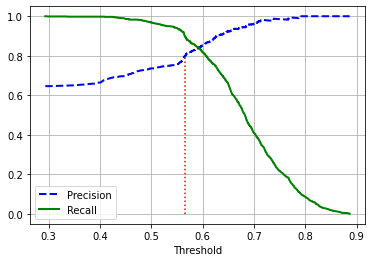

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#next step is to have it capture 90% of all negative comments(which is about )

In [ ]:
plot_precision_recall_vs_threshold(Precision, recalls, thresholds)
#next step is to have it capture 90% of all negative comments(which is about )

NameError: ignored

In [ ]:
for i, thresh in enumerate(thresholds):
  print(thresh, precisions[i], recalls[i])

0.293601649329707 0.6464507236388698 1.0
0.29930510804596844 0.6462068965517241 0.9989339019189766
0.3052624866377801 0.6466528640441684 0.9989339019189766
0.31042865094087363 0.6470994475138122 0.9989339019189766
0.31383733138315945 0.6475466482377332 0.9989339019189766
0.3236183683891565 0.6479944674965422 0.9989339019189766
0.3304810602917525 0.6484429065743945 0.9989339019189766
0.3351525241765593 0.6488919667590027 0.9989339019189766
0.33705691869201526 0.6486486486486487 0.997867803837953
0.34039025202534856 0.6490984743411928 0.997867803837953
0.34516950142423264 0.6495489243580846 0.997867803837953
0.34953180313076676 0.65 0.997867803837953
0.3500609771010216 0.65045170257123 0.997867803837953
0.35059469743432653 0.650904033379694 0.997867803837953
0.35477530981980404 0.651356993736952 0.997867803837953
0.35621796983637904 0.6518105849582173 0.997867803837953
0.3576154948507972 0.6522648083623693 0.997867803837953
0.3601129734455067 0.6527196652719666 0.997867803837953
0.361301

In [ ]:
y_pred_thresh = 1*(y_pred_proba > .565)


In [ ]:
print(classification_report(y_test, y_pred_thresh))

ValueError: ignored

In [ ]:
y_score[:,1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
y_test

9170     negative
1288     negative
1133     negative
11619    negative
7363     negative
           ...   
6568      neutral
5156     positive
10648    negative
5158     positive
8153      neutral
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_test_oh[:,1]

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [ ]:
y_scores[0][:,1]

array([0.5928184 , 0.62953308, 0.55843017, ..., 0.64746358, 0.65481204,
       0.64894293])

In [ ]:
y_scores

[array([[0.37183912, 0.62816088],
        [0.34851095, 0.65148905],
        [0.34556126, 0.65443874],
        ...,
        [0.38370764, 0.61629236],
        [0.43462533, 0.56537467],
        [0.39188161, 0.60811839]]), array([[0.77760225, 0.22239775],
        [0.79213414, 0.20786586],
        [0.78997086, 0.21002914],
        ...,
        [0.77700682, 0.22299318],
        [0.7850022 , 0.2149978 ],
        [0.76449409, 0.23550591]]), array([[0.85055863, 0.14944137],
        [0.85935491, 0.14064509],
        [0.86446788, 0.13553212],
        ...,
        [0.83928554, 0.16071446],
        [0.78037247, 0.21962753],
        [0.84362431, 0.15637569]])]

In [ ]:
y_test_oh

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
type(X_test_w_features)

pandas.core.frame.DataFrame

In [ ]:
y_test_oh_1 = np.array(y_test_oh[:,1])
X_test_w_features_1= np.array(X_test_w_features)

In [ ]:
type(X_test_w_features_1)

numpy.ndarray

In [ ]:
type(y_test_oh_1)

numpy.ndarray

In [ ]:
y_test_oh_1.shape

(1464,)

In [ ]:
X_test_w_features_1.shape

(1464, 10010)

In [ ]:
model

In [ ]:
from sklearn.metrics import classification_report

def precision_recall(modelrf, X_test_w_features, y_test, threshold, beta = 0.5):
    
    y_pred = (modelrf.predict_proba(X_test_w_features)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# pets that were predicted to get adopted and did
    tp = matrix[1,1]# pets that were predicted not to get adopted and didn't
    fp = matrix[0,1]# pets that were predicted not to get adopted but did
    fn = matrix[1,0]# pets that were predicted to get adopted but didn't
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [ ]:
y_test # change neutral to false along with negative being false as well 

1521     negative
6081     positive
9428     negative
12146    negative
6915      neutral
           ...   
1669     negative
590       neutral
7105      neutral
8121     positive
192      negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_pred = (modelrf.predict_proba(X_test_w_features)[:,1] >= 0.38).astype(bool)

print(classification_report(y_test,y_pred))

In [ ]:

threshold_df = pd.df(columns=['Precision','Recall','F0.5_measure'])

for threshold in np.arange(0.1,.9,.02):
    
    threshold_df.loc[threshold] = precision_recall(modelrf, X_test_w_features, y_test, threshold)
 
#print(threshold_df[0.1])

In [ ]:
ax = threshold_df.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.38, color='black', alpha=0.3)
ax.text(.365,.65,'Optimal Threshold F0.5',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.5, color ='black', alpha = 0.3)
ax.text(.485,.7,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

General NB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['airline']== df['airline'], 'text'], df.loc[df['airline']== df['airline'], 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))


In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10010 words in dictionary
Top 5 most common words are: [('flight', 3522), ('not', 1444), ('no', 1361), ('get', 1203), ('t', 1079)]


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 


" check awesome bag flight carry on... Decisions..." is converted into [71, 225, 34, 1, 535, 84, 2292]


In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[71, 225, 34, 1, 535, 84, 2292]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.


In [ ]:
X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[71, 225, 34, 1, 535, 84, 2292]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.


In [ ]:
#pass only this 
from sklearn.model_selection import KFold
def cv_score(modelrf, X, y, scorefunc):
    result = 0.
    #print("Shape:", X.shape, y.shape)
    nfold = 5
    kf = KFold(n_splits=nfold)
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      modelrf.fit(X_train, y_train) # fit the classifier, passed is as clf.
      result += scorefunc(modelrf, X_test, y_test) # evaluate score function on held-out data
    return result / nfold
    #pass only this

In [ ]:
def log_likelihood(modelrf, X, y):
    prob = modelrf.predict_log_proba(X)
    negative = y == 0
    airline_sentiment = ~negative
    return prob[negative, 0].sum() + prob[airline_sentiment, 1].sum()
    #KEEP

In [ ]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(df.shape[0]), train_size=0.7)
mask = np.zeros(df.shape[0], dtype=np.bool)
mask[itest] = True
#KEEP

In [ ]:
def make_xy(df, airline,  vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df= 30)
    X = vectorizer.fit_transform(df.text) #only works on string data, 
    X = X.tocsc()  # some versions of sklearn return COO format
    y = df.airline_sentiment# use label encoding then call this cell 
    return X, y, vectorizer

    #USE THIS ONE

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#use tfid vectorizer 
vectorizer = TfidfVectorizer(min_df= 30)
X, y, vectorizer = make_xy(df[df.airline == df.airline], vectorizer)
#xtrain=X[mask]
#ytrain=y[mask]
#xtest=X[~mask]
#ytest=y[~mask]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

modelrf = MultinomialNB().fit(X_train, y_train)
#best_min_df = trial_min_df

#your turn. Print the accuracy on the test and training dataset
training_accuracy = modelrf.score(X_train, y_train)
test_accuracy = modelrf.score(X_test, y_test)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
#Accuracy on training data: 0.727231
#Accuracy on test data:     0.704625

#vectorizer the text and then run through it the random forest 

Accuracy on training data: 0.756916
Accuracy on test data:     0.734290


In [ ]:
#try reruning this 
words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test.shape[1])
probs = modelrf.predict_log_proba(x)[:, 1]
ind = np.argsort(probs)

good_words = words[ind[:20]] #try larger number
bad_words = words[ind[-20:]] # try larger number 

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("positive\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

print("negative\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    #try min df 100, 150, 200

positive	     P(fresh | word)
                http 0.44
             airways 0.40
           companion 0.38
                 add 0.38
            question 0.36
            possible 0.31
              winter 0.29
              chance 0.29
             atlanta 0.28
              follow 0.22
negative	     P(fresh | word)
               worst 0.98
          ridiculous 0.97
                hour 0.96
             helpful 0.96
          frustrated 0.96
        unacceptable 0.96
               hours 0.96
                 fix 0.96
                been 0.95
               worse 0.95


In [ ]:
x=[1-np.exp(p) for p in bad_prob]
y=bad_words

In [ ]:
x=[1-np.exp(p) for p in good_prob][:10]
y=good_words[:10]

In [ ]:
x=[1-np.exp(p) for p in good_prob][:10][::-1]
y=good_words[:10][::-1]

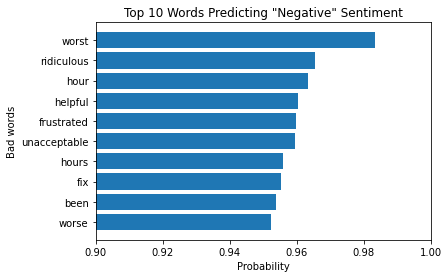

In [ ]:

plt.barh(y, x)

plt.title('Top 10 Words Predicting "Negative" Sentiment')
plt.xlabel('Probability')
plt.ylabel('Bad words')

plt.xlim([.9,1])
plt.show()

In [ ]:
roc_auc_score(y_test_oh,prediction_test_lg )

In [ ]:
np.identity()

In [ ]:
prediction_test = modelrf.predict(X_test_w_features)

In [ ]:
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = sm.add_constant(x)

In [ ]:
results.params

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
rounded_labels=np.argmax(prediction_test, axis=1)
rounded_labels[1]

0

In [ ]:
from sklearn.metrics import mean_squared_error
#Print the prediction accuracy
print ("mean_squared_error = ", mean_squared_error(y_test_oh, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data
#One amazing feature of Random forest is that it provides us info on feature importances

# get the r2 
#mean2 squared error

mean_squared_error =  0.2547814


In [ ]:
from sklearn.metrics import mean_squared_error
#Print the prediction accuracy
print ("mean_squared_error = ", mean_squared_error(y_test_oh, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data
#One amazing feature of Random forest is that it provides us info on feature importances

# get the r2 
#mean2 squared error

mean_squared_error =  0.22176684


In [ ]:
print(best_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
from sklearn.metrics import R2
from sklearn.metrics import mean_squared_error

ImportError: ignored

In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))


R2 score -0.18910403698116732
RMSE 0.46164355


In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))

NameError: ignored

In [ ]:
print(grid_result.best_score_)


0.8060113368460916
